In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(17)


import sampling

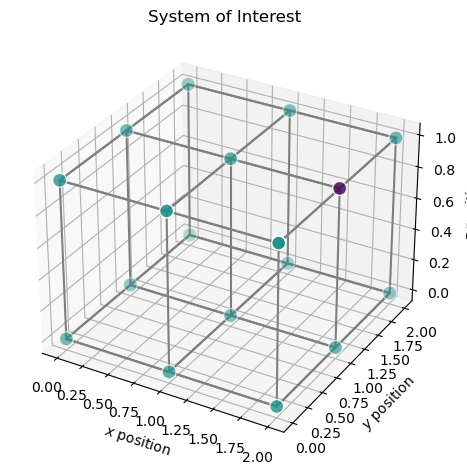

spin config: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
Energy: 0.0


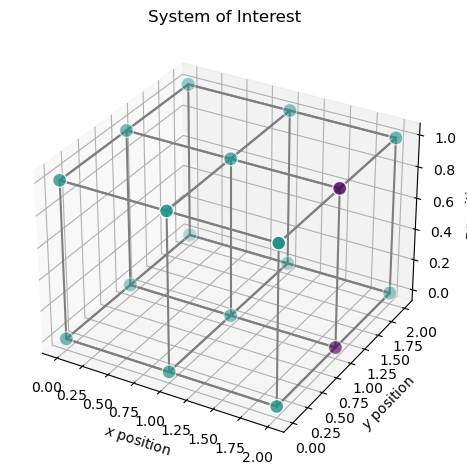

spin config: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
Energy: -1.0


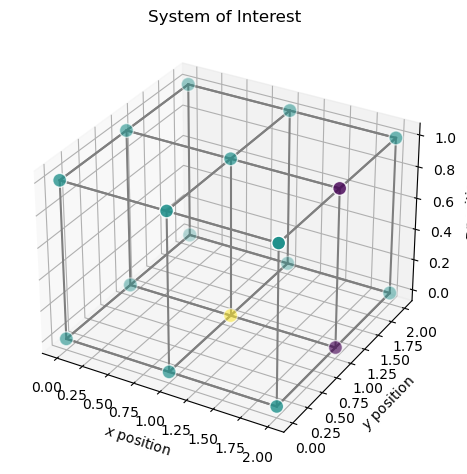

spin config: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
Energy: 0.0


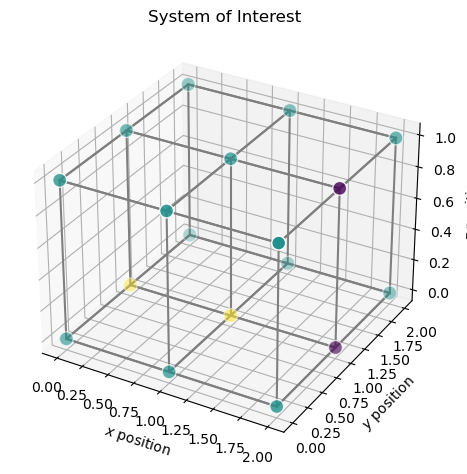

spin config: [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
Energy: 0.0


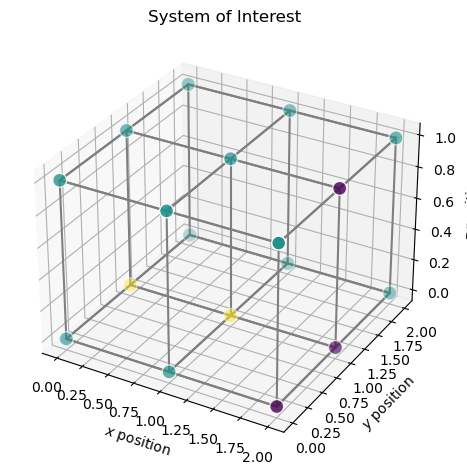

spin config: [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0. -1. -1.  0.  0.]
Energy: -1.0


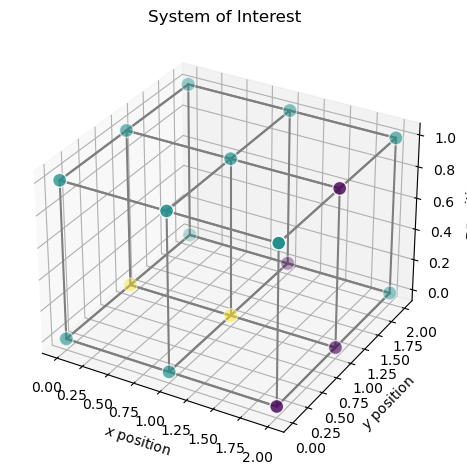

spin config: [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0. -1.  0. -1.  0. -1. -1.  0.  0.]
Energy: 0.0


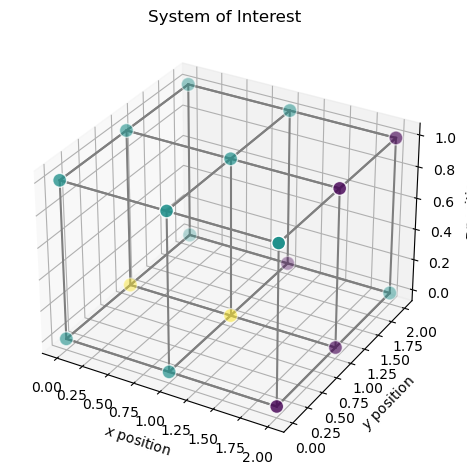

spin config: [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0. -1.  0. -1.  0. -1. -1.  0. -1.]
Energy: -1.0


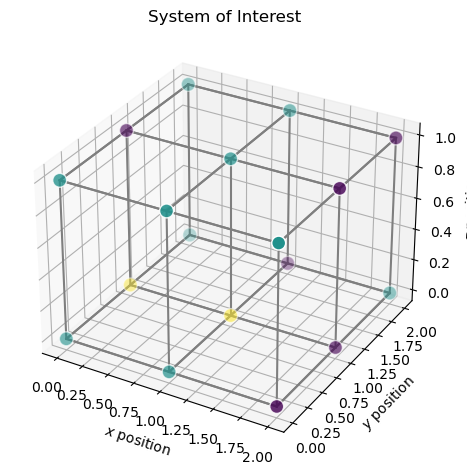

spin config: [ 0.  0.  1. -1.  0.  0.  0.  0.  1.  0. -1.  0. -1.  0. -1. -1.  0. -1.]
Energy: -1.0


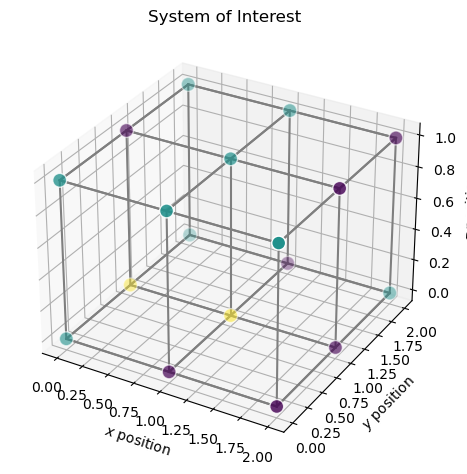

spin config: [ 0.  0.  1. -1.  0.  0. -1.  0.  1.  0. -1.  0. -1.  0. -1. -1.  0. -1.]
Energy: -2.0


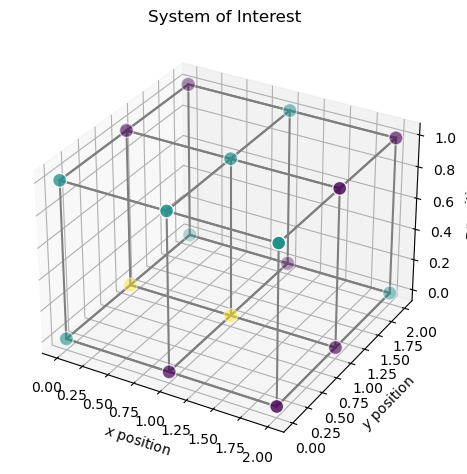

spin config: [ 0.  0.  1. -1.  0. -1. -1.  0.  1.  0. -1.  0. -1.  0. -1. -1.  0. -1.]
Energy: -4.0


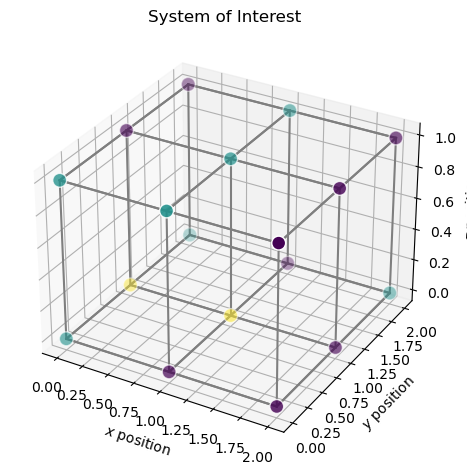

spin config: [ 0.  0.  1. -1.  0. -1. -1.  0.  1.  0. -1.  0. -1. -1. -1. -1.  0. -1.]
Energy: -7.0


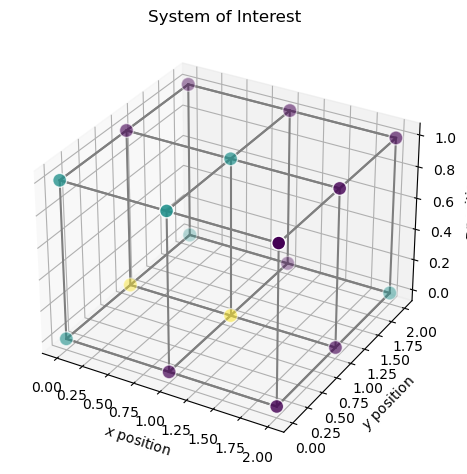

spin config: [ 0.  0.  1. -1.  0. -1. -1.  0.  1.  0. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -10.0


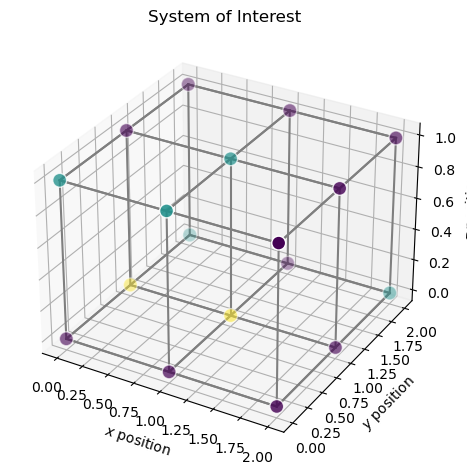

spin config: [-1.  0.  1. -1.  0. -1. -1.  0.  1.  0. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -11.0


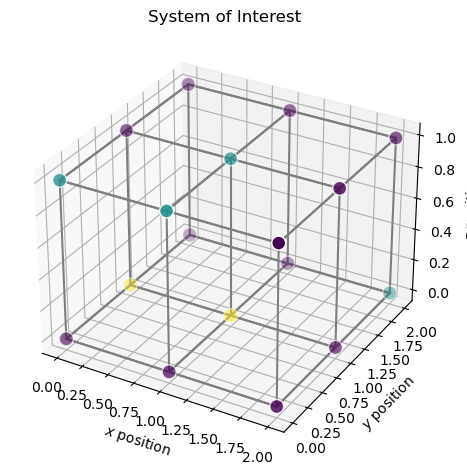

spin config: [-1.  0.  1. -1. -1. -1. -1.  0.  1.  0. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -13.0


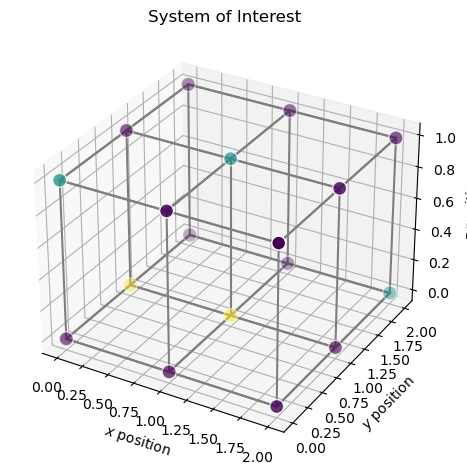

spin config: [-1.  0.  1. -1. -1. -1. -1. -1.  1.  0. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -16.0


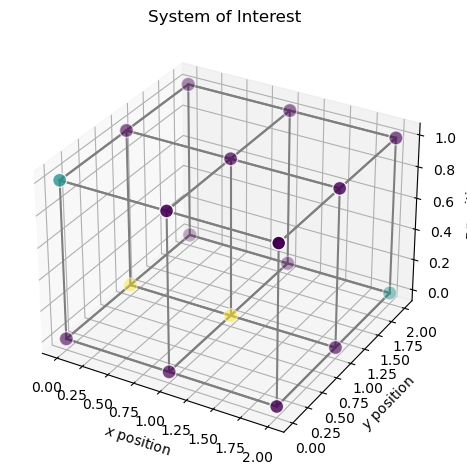

spin config: [-1.  0.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -19.0


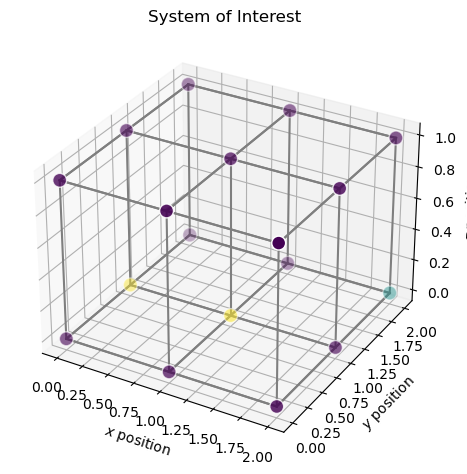

spin config: [-1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  0. -1.]
Energy: -24.0


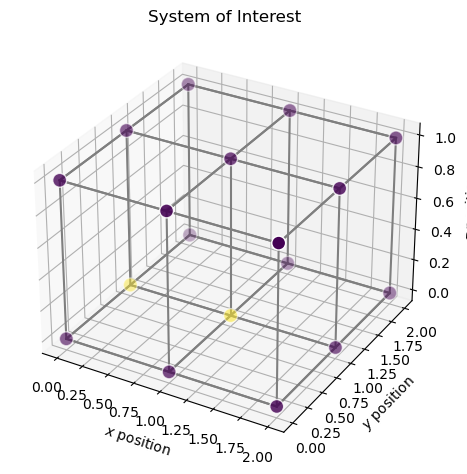

spin config: [-1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Energy: -29.0


In [2]:
dimensions=[3,3,2]
nodes = sampling.init_square_grid_nodes(dimensions=dimensions)
edges = sampling.init_square_grid_internal_edges(nodes=nodes)
edges = sampling.add_square_grid_periodic_boundary_edges(
    dimensions=dimensions,
    nodes=nodes,
    edges=edges
)
G = sampling.Graph(nodes=nodes, edges=edges)


# ferromagnetic edges:
J = {e:1.0 for e in G.edges()}
G.set_couplings(J)

T = 3 # set Temperature T
k_B = 1.0 # set Boltzmann constant
beta = 1/(k_B*T)



spin_config = sampling.generate_randomized_greedy_spin_config(G=G, beta=beta, plot_progress=True)




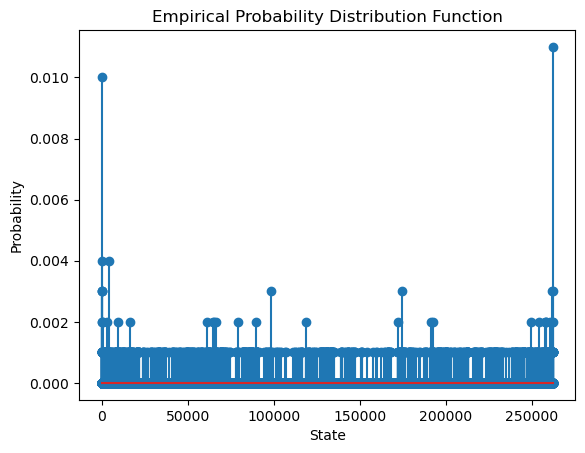

In [3]:
# observe the empirical distribution of spin_configs constructed by the greedy, randomized method:

n = len(G.nodes())
N = 2**n
empirical_pdf = np.zeros(N)
num_samples = 1000

for s in range(num_samples):
    spin_config = sampling.generate_randomized_greedy_spin_config(G=G, beta=beta)
    state_index = sampling.convert_spin_config_to_state_index(spin_config)
    empirical_pdf[state_index] += 1


empirical_pdf *= (1/num_samples) # normalize to empirical probability dist. function.
plt.stem(empirical_pdf)
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Empirical Probability Distribution Function")
plt.show()


The empirical PDF of the samples that were constructed by the greedy, randomized method is similar to the exact PDF as calculated in the `02_brute_force_probability_distribution_calculation.ipynb` example (assuming the user kept the same parameters), but *different* enough that we can't simply trust it as is.

In the next notebook `04_mcmc.ipynb`, we start our Monte Carlo Markov Chain (MCMC) with initial starting points constructed by the greedy, randomized method.